# Inbound Call Volume in a  Call Center using Time Series Forcasting 

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import os
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(20,10)})
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import plotly.express as px
import plotly.io as pio; pio.renderers.default='notebook'
import pmdarima  
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [186]:
series= pd.read_excel('EstesData.xlsx' , sheet_name='Date Wise Data',  parse_dates=['Date'], index_col='Date', squeeze=True)  

In [187]:
series.head()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count,Offered%,SL%
Date,,,,,
2020-01-01,10550.989566,6176,6092,0.585348,0.986399
2020-01-02,0.000000,0,0,-,-
2020-01-03,9669.070469,8835,8712,0.913738,0.986078
2020-01-04,9173.621264,9586,9447,1.04495,0.9855
2020-01-05,0.000000,0,0,-,-


In [188]:
type(series)

pandas.core.frame.DataFrame

In [189]:
series.corr()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
ForecastVolume,1.000000,0.971742,0.803947
OfferedVolume,0.971742,1.000000,0.807374
Volume within SL / Interval Met Count,0.803947,0.807374,1.000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

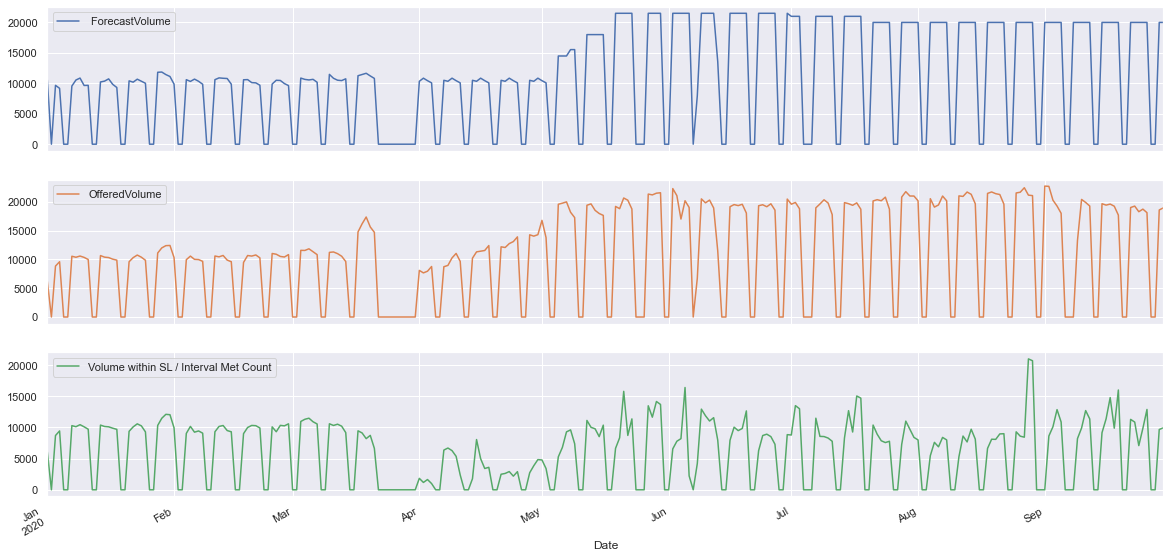

In [190]:
series.plot(subplots=True)

In [192]:
series.resample('W').mean()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-05,5878.736260,4919.400000,4850.200000
2020-01-12,7180.499669,7399.285714,7243.142857
2020-01-19,7206.514745,7320.428571,7177.571429
2020-01-26,7374.624460,7263.285714,7088.857143
2020-02-02,8011.168383,8311.857143,7988.285714
2020-02-09,7396.716474,7160.000000,6715.000000
2020-02-16,7566.908755,7306.857143,6944.000000
2020-02-23,7294.636680,7388.714286,7079.428571
2020-03-01,7203.552968,7662.285714,7229.571429


<AxesSubplot:xlabel='Date'>

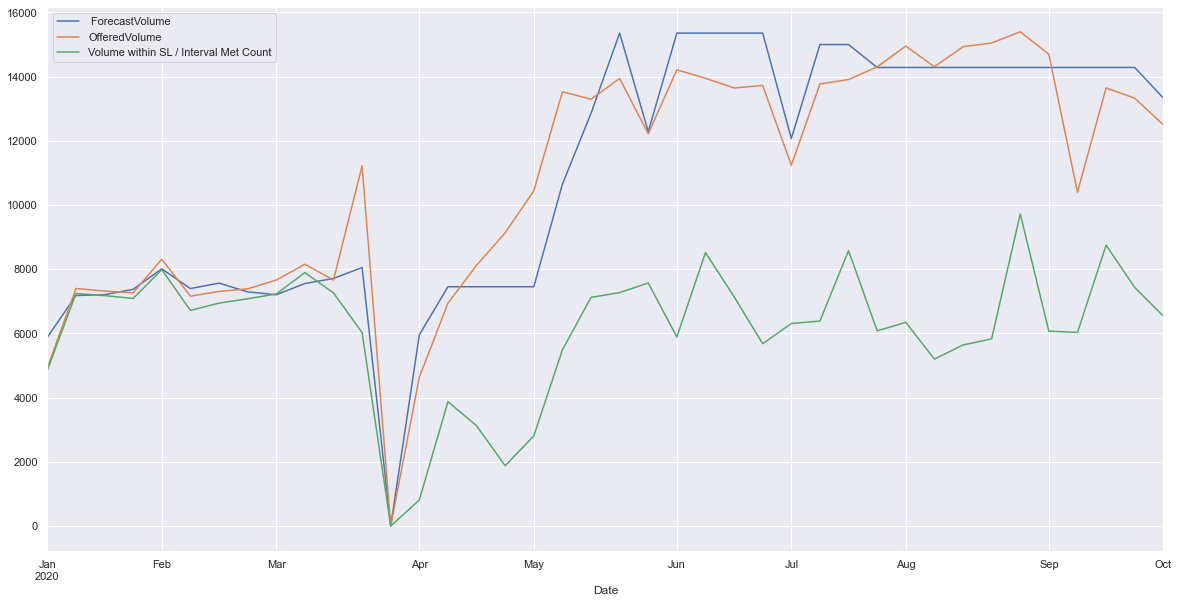

In [198]:
series.resample('W').mean().plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

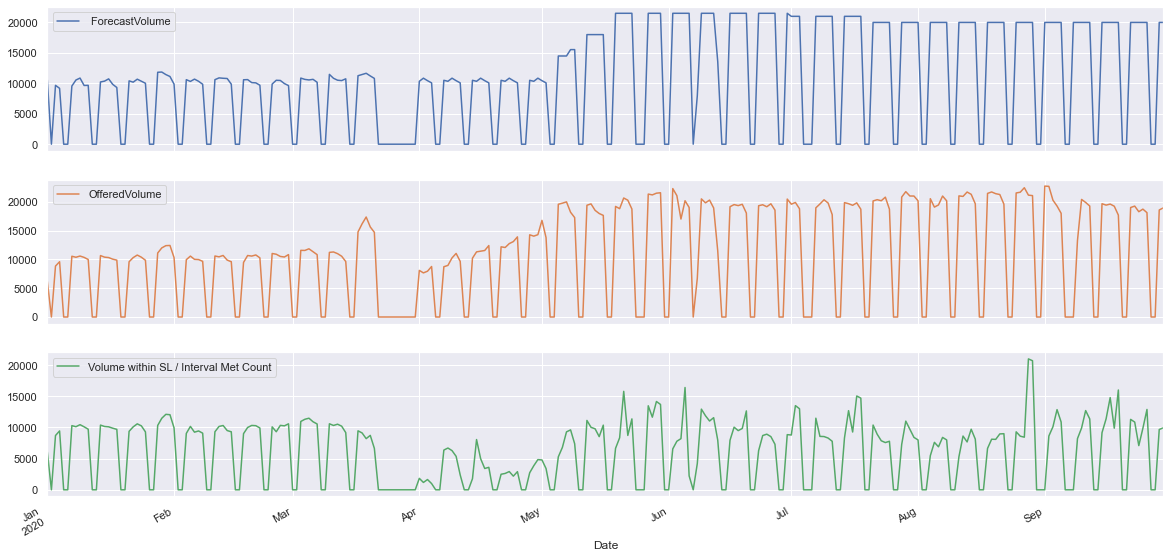

In [196]:
series.resample('D').mean().plot(subplots=True)

In [147]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2020-01-01 to 2020-09-30
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0    ForecastVolume                        274 non-null    float64
 1   OfferedVolume                          274 non-null    int64  
 2   Volume within SL / Interval Met Count  274 non-null    int64  
 3   Offered%                               274 non-null    object 
 4   SL%                                    274 non-null    object 
 5   OfferedVolume_diff                     267 non-null    float64
 6   OfferedVolume_log                      274 non-null    float64
 7   OfferedVolume_log_diff                 225 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 29.3+ KB


In [199]:
series_daily=series.resample('D').mean()
series_daily.head()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-01,10550.989566,6176,6092
2020-01-02,0.000000,0,0
2020-01-03,9669.070469,8835,8712
2020-01-04,9173.621264,9586,9447
2020-01-05,0.000000,0,0


In [148]:
#series.drop(columns=[' ForecastVolume', 'Volume within SL / Interval Met Count', 'Offered%','SL%'], inplace= True)

In [200]:
#series.head()

# Tests for checking if series is stationary 

In [201]:
test_result=adfuller(series["OfferedVolume"])

In [202]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Offered):
    result=adfuller(Offered)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [203]:
adfuller_test(series['OfferedVolume'])

ADF Test Statistic : -1.5411522409296816
p-value : 0.5130646691971141
#Lags Used : 14
Number of Observations Used : 259
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [205]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


kpss_test(series['OfferedVolume'])

Results of KPSS Test:
Test Statistic            1.234461
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


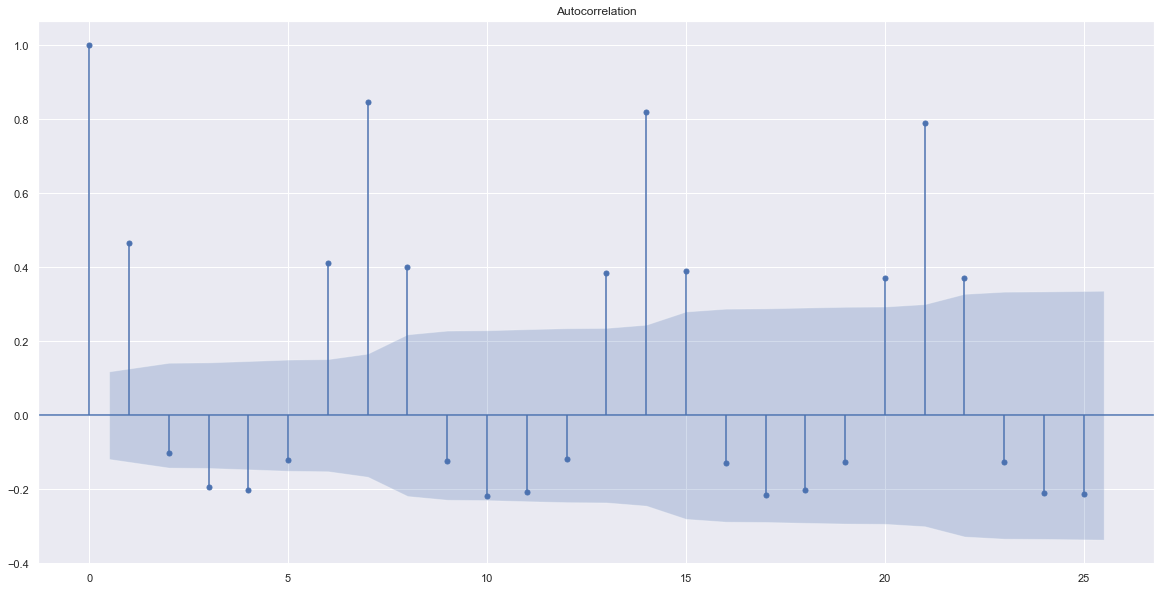

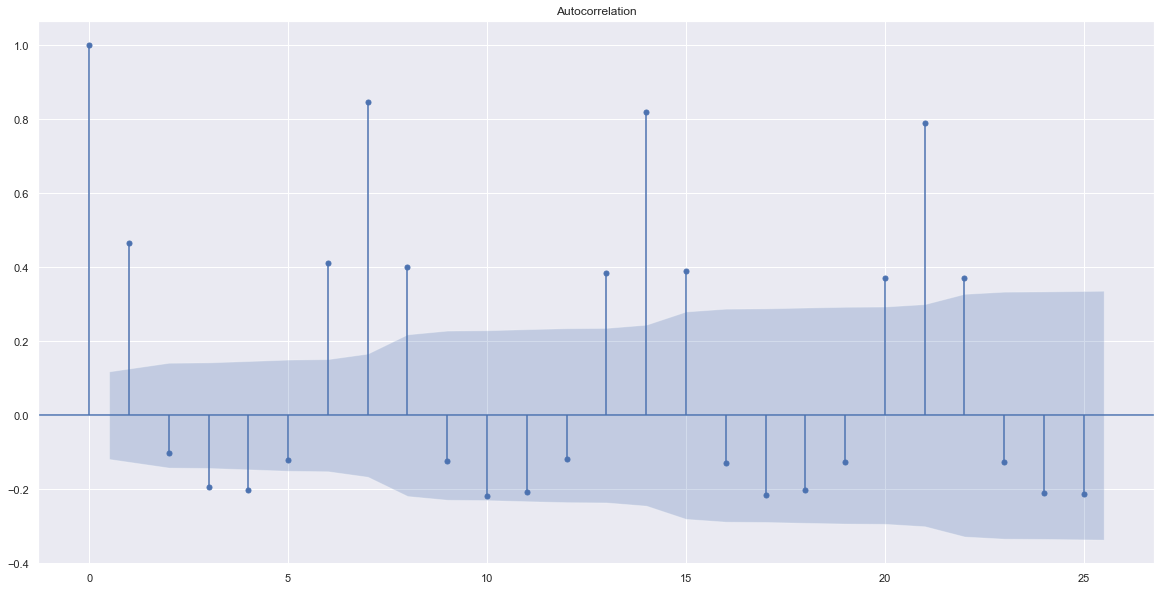

In [204]:
plot_acf(series['OfferedVolume'])

# Differencing

<AxesSubplot:xlabel='Date'>

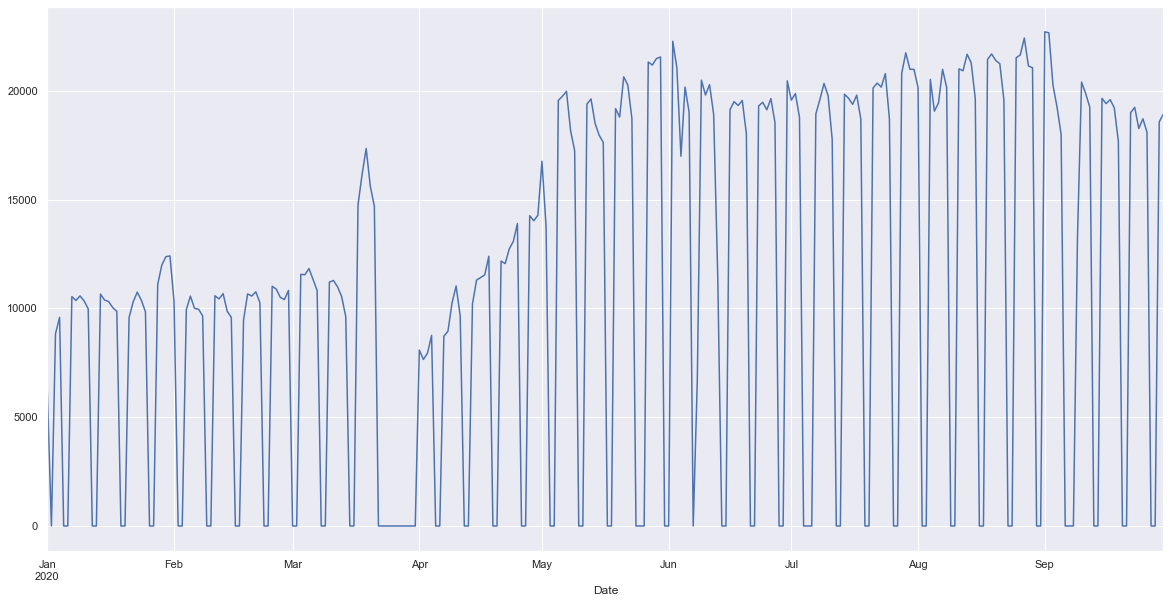

In [159]:
series['OfferedVolume_diff'] = series['OfferedVolume'] - series['OfferedVolume'].shift(1)
series['OfferedVolume'].dropna().plot()

Seasonal Differencing

<AxesSubplot:xlabel='Date'>

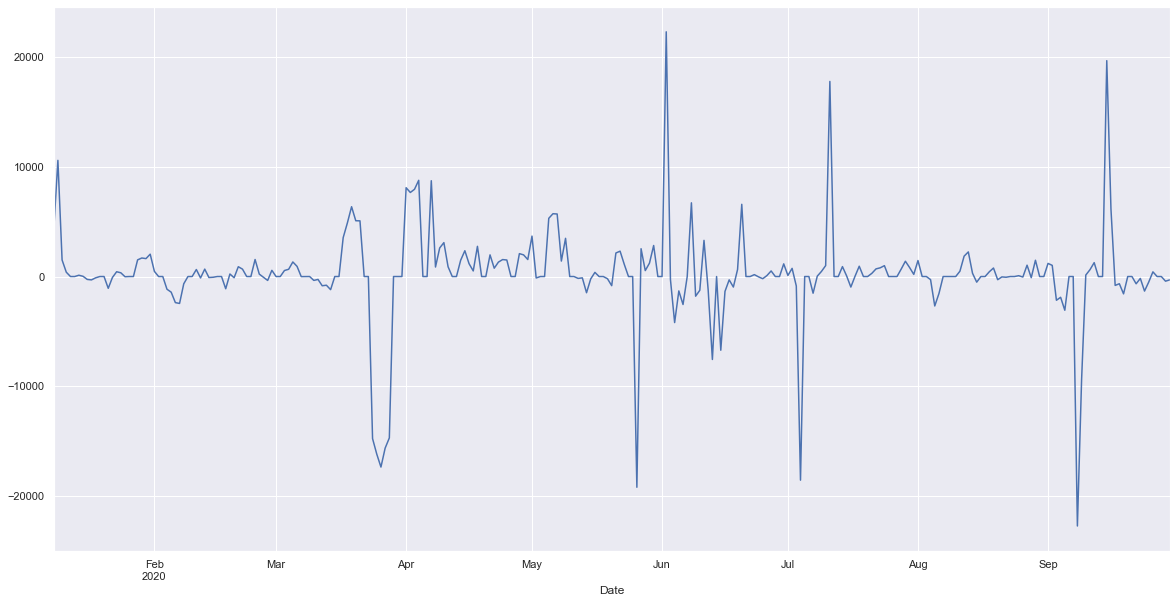

In [83]:
n=7
series['OfferedVolume_diff'] = series['OfferedVolume'] - series['OfferedVolume'].shift(n)
series['OfferedVolume_diff'].dropna().plot()

Transformation

<AxesSubplot:xlabel='Date'>

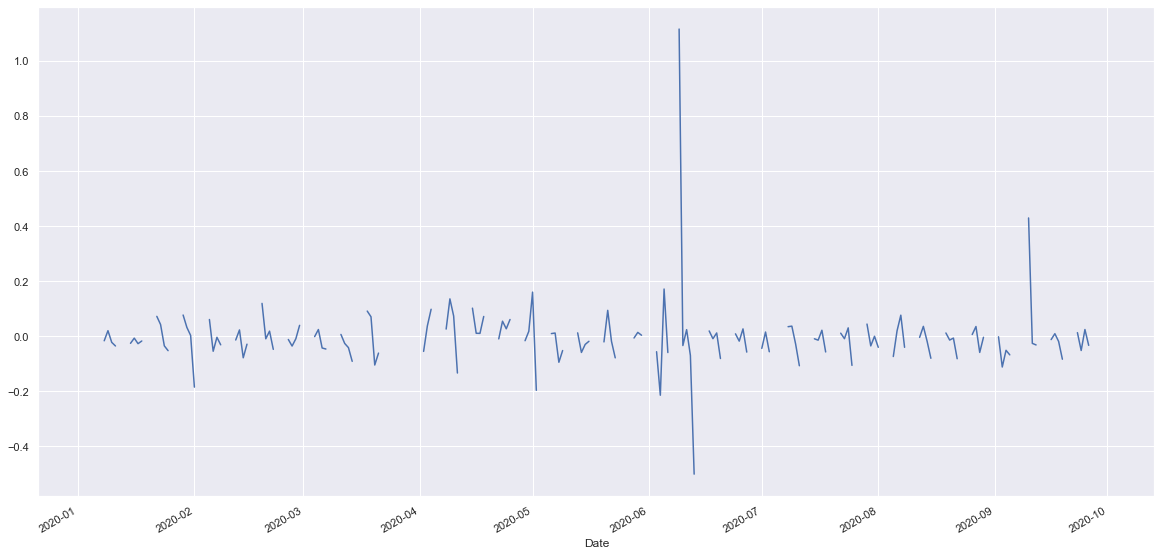

In [81]:
series['OfferedVolume_log'] = np.log(series['OfferedVolume'])
series['OfferedVolume_log_diff'] = series['OfferedVolume_log'] - series['OfferedVolume_log'].shift(1)
series['OfferedVolume_log_diff'].dropna().plot()

# ACF and PACF Graphs

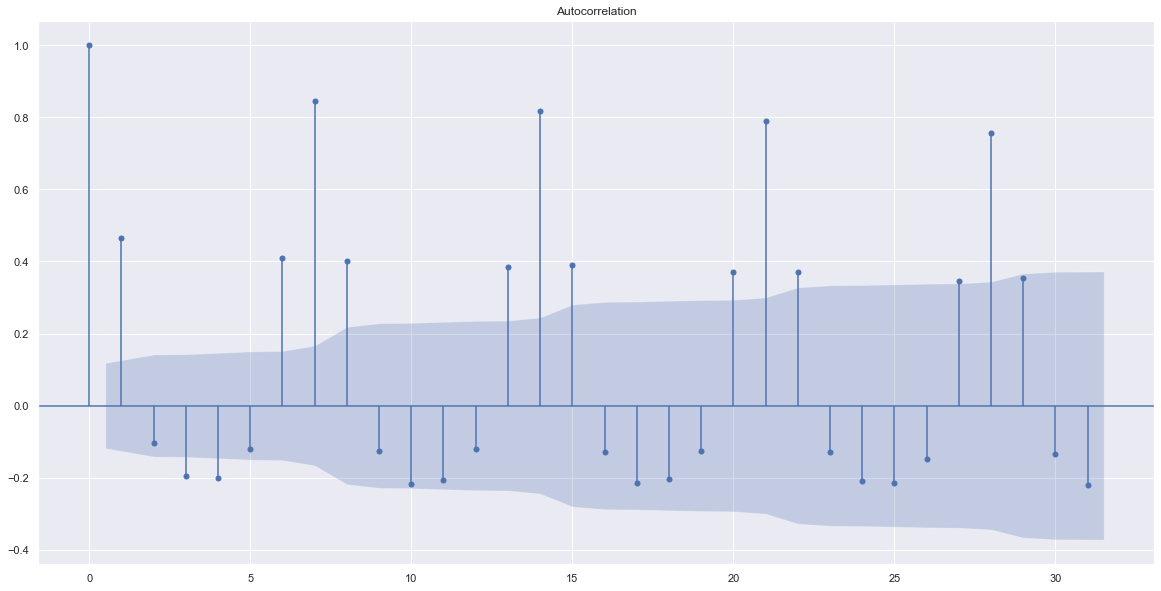

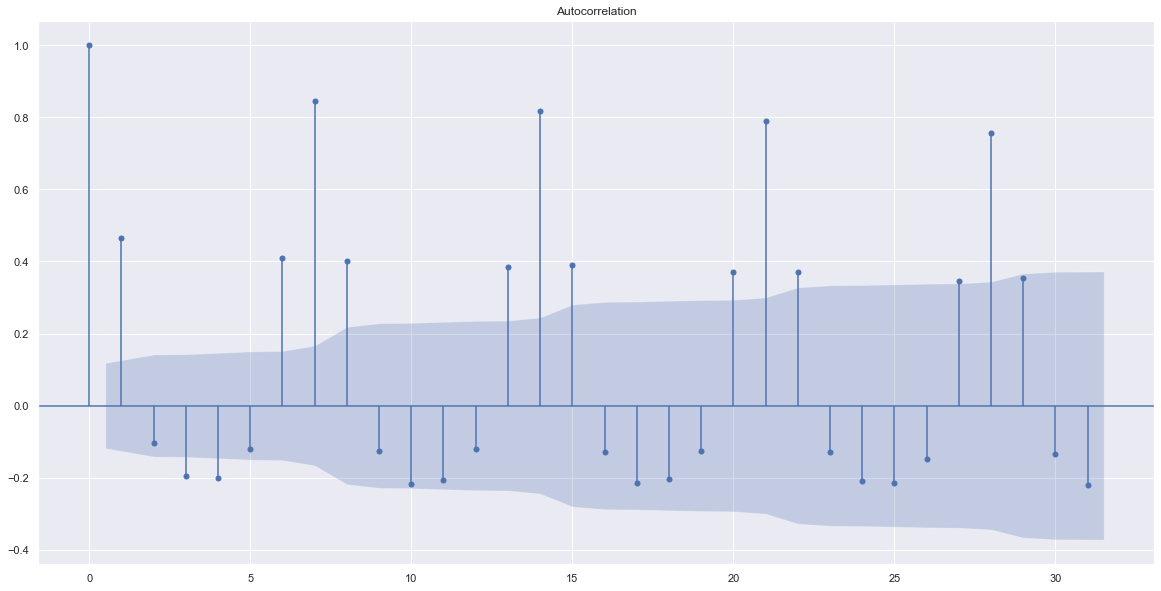

In [233]:
plot_acf(series['OfferedVolume'], lags=31)

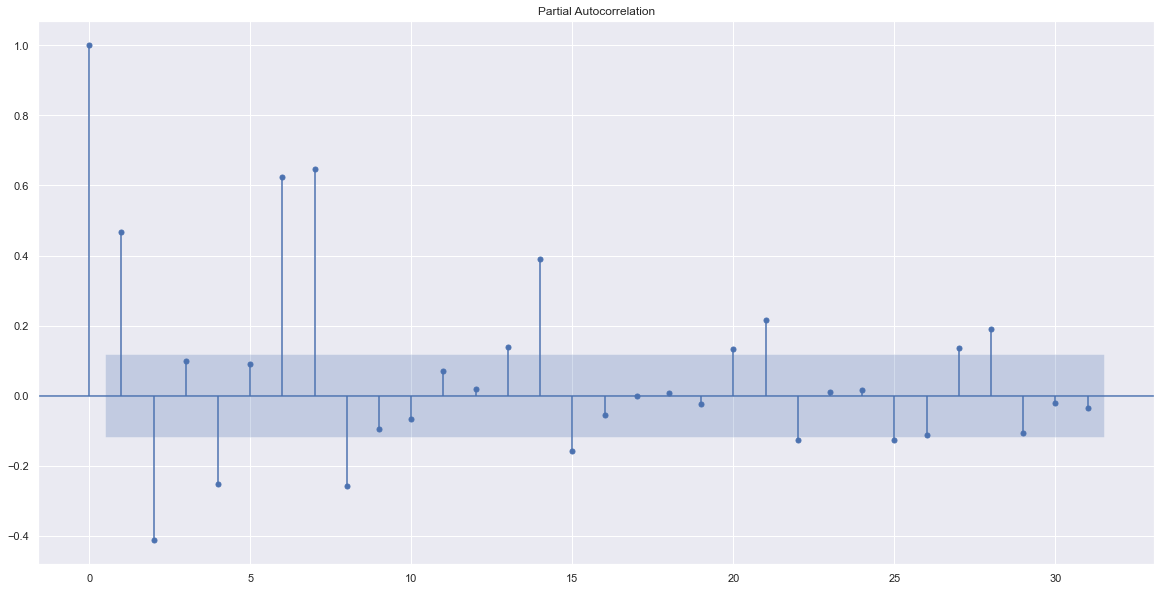

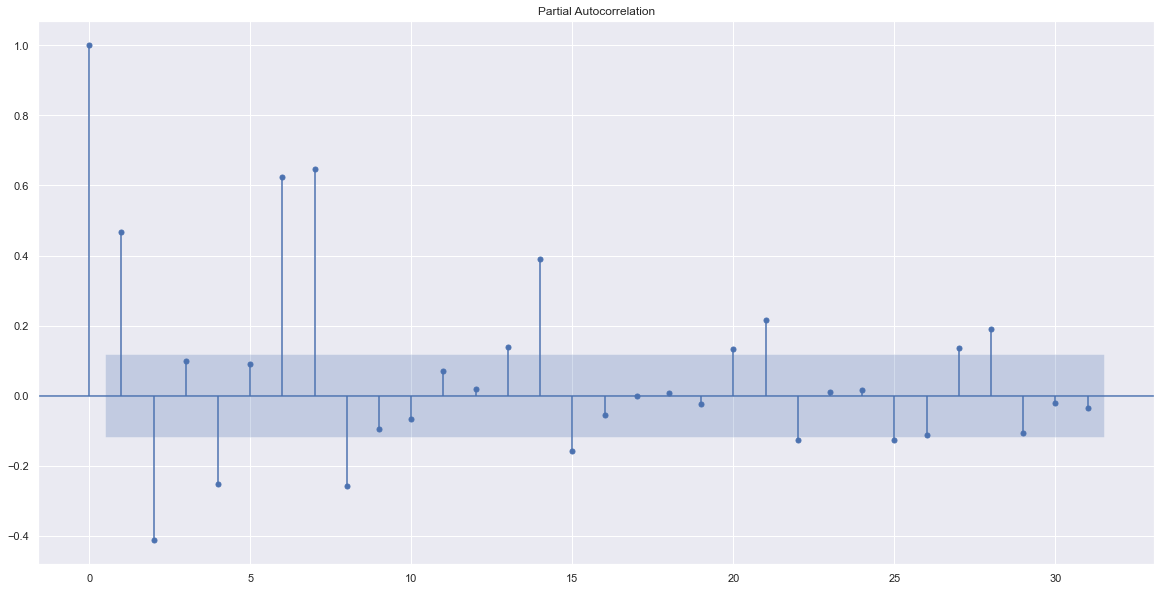

In [234]:
plot_pacf(series['OfferedVolume'],lags=31)

In [160]:
series_daily['OfferedVolume']

Date
2020-01-01     6176
2020-01-02        0
2020-01-03     8835
2020-01-04     9586
2020-01-05        0
              ...  
2020-09-26    18100
2020-09-27        0
2020-09-28        0
2020-09-29    18567
2020-09-30    18931
Freq: D, Name: OfferedVolume, Length: 274, dtype: int64

# Time Series - Auto Regressive

In [211]:
train=series_daily[(series_daily.index.get_level_values(0) <= '2020-07-31') ] #& (series_daily.index.get_level_values(0) <= '2020-07-31')]
test=series[(series_daily.index.get_level_values(0) > '2020-07-31')]

In [212]:
train.size

639

In [213]:
train 

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-01,10550.989566,6176,6092
2020-01-02,0.000000,0,0
2020-01-03,9669.070469,8835,8712
2020-01-04,9173.621264,9586,9447
2020-01-05,0.000000,0,0
...,...,...,...
2020-07-27,0.000000,0,0
2020-07-28,20000.000000,20804,7283
2020-07-29,20000.000000,21742,11020


In [214]:
test

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count,Offered%,SL%
Date,,,,,
2020-08-01,20000.0,20152,8005,1.0076,0.397231
2020-08-02,0.0,0,0,-,-
2020-08-03,0.0,0,0,-,-
2020-08-04,20000.0,20523,5471,1.02615,0.266579
2020-08-05,20000.0,19062,7617,0.9531,0.399591
...,...,...,...,...,...
2020-09-26,20000.0,18100,12893,0.905,0.71232
2020-09-27,0.0,0,0,-,-
2020-09-28,0.0,0,0,-,-


In [265]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.ar_model import AR

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [311]:
tsmodel = AR(series['OfferedVolume'] ) #, order=(0,1,2))

In [312]:
tsmodel_fit=tsmodel.fit()

In [313]:
tsmodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      O  -                  f                  f
Model:                         AR(15)   Log Likelihood               -2469.579
Method:                          cmle   S.D. of innovations           3347.994
Date:                Tue, 06 Apr 2021   AIC                             16.364
Time:                        17:45:18   BIC                             16.597
Sample:                    01-01-2020   HQIC                            16.457
                         - 09-30-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1204.5841    723.441      1.665      0.096    -213.334    2622.503
L1.OfferedVolume      0.4190      0.063      6.610      0.000       0.295       0.543
L2.OfferedVolume     -0.0326      0.063     -0.518      0.604      -0.156       0.091
L3.OfferedVolume      0.1034      0.063      1.643      0.100      -0.020       0.227
L4.OfferedVolume     -0.0389      0.063     -0.615      0.539      -0.163       0.085
L5.OfferedVolume     -0.0869      0.063     -1.373      0.170      -0.211       0.037
L6.OfferedVolume      0.1355      0.063      2.143      0.032       0.012       0.259
L7.OfferedVolume      0.4151      0.063      6.559      0.000       0.291       0.539
L8.OfferedVolume     -0.1683      0.068     -2.477      0.013      -0.301      -0.035
L9.OfferedVolume     -0.0363      0.064     -0.563      0.573      -0.162       0.090
L10.OfferedVolume    -0.0981      0.064     -1.538      0.124      -0.223       0.027
L11.OfferedVolume     0.0446      0.064      0.698      0.485      -0.081       0.170
L12.OfferedVolume     0.0167      0.064      0.262      0.794      -0.109       0.142
L13.OfferedVolume    -0.0532      0.064     -0.837      0.403      -0.178       0.071
L14.OfferedVolume     0.4356      0.063      6.912      0.000       0.312       0.559
L15.OfferedVolume    -0.1535      0.063     -2.430      0.015      -0.277      -0.030
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9285           -0.4422j            1.0284           -0.4293
AR.2            -0.9285           +0.4422j            1.0284            0.4293
AR.3            -1.1102           -0.0000j            1.1102           -0.5000
AR.4            -0.6502           -0.8725j            1.0882           -0.3519
AR.5            -0.6502           +0.8725j            1.0882            0.3519
AR.6            -0.2237           -0.9803j            1.0055           -0.2857
AR.7            -0.2237           +0.9803j            1.0055            0.2857
AR.8             0.2590           -1.1240j            1.1535           -0.2140
AR.9             0.2590           +1.1240j            1.1535            0.2140
AR.10            0.6255           -0.7833j            1.0024           -0.1428
AR.11            0.6255           +0.7833j            1.0024            0.1428
AR.12            1.0182           -0.0000j            1.0182           -0.0000
AR.13            1.0195           -0.4573j            1.1174           -0.0671
AR.14            1.0195           +0.4573j            1.1174            0.0671
AR.15            2.7266           -0.0000j            2.7266           -0.0000
------------------------------------------------------------------------------
"""

In [314]:
print('The lag value chose is: %s' % tsmodel_fit.k_ar)

The lag value chose is: 15


In [315]:
print('The coefficients of the model are:\n %s' % tsmodel_fit.params)


The coefficients of the model are:
 const                1204.584143
L1.OfferedVolume        0.419025
L2.OfferedVolume       -0.032645
L3.OfferedVolume        0.103434
L4.OfferedVolume       -0.038878
L5.OfferedVolume       -0.086855
L6.OfferedVolume        0.135503
L7.OfferedVolume        0.415148
L8.OfferedVolume       -0.168323
L9.OfferedVolume       -0.036273
L10.OfferedVolume      -0.098099
L11.OfferedVolume       0.044573
L12.OfferedVolume       0.016720
L13.OfferedVolume      -0.053171
L14.OfferedVolume       0.435634
L15.OfferedVolume      -0.153507
dtype: float64


In [316]:
# make predictions 
predictions = tsmodel_fit.predict(
    start=len(train ), 
    end=len(train) + len(train)-1, 
    dynamic=False)

In [317]:
predictions

2020-08-01    18288.920783
2020-08-02      976.771473
2020-08-03      283.260250
2020-08-04    19348.836892
2020-08-05    21450.779742
                  ...     
2021-02-25    16217.806904
2021-02-26    17489.177459
2021-02-27    13897.591856
2021-02-28     4834.647082
2021-03-01     4526.400883
Freq: D, Length: 213, dtype: float64

<AxesSubplot:>

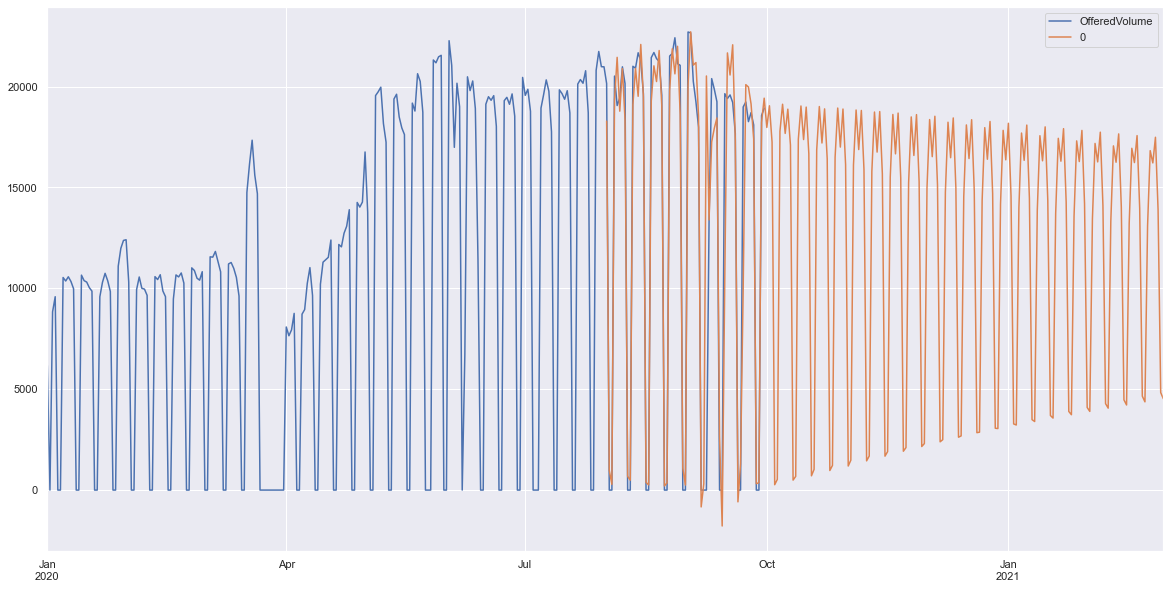

In [318]:
pd.concat([series['OfferedVolume'],predictions],axis=1).plot()

In [319]:
output=pd.concat([series['OfferedVolume'],predictions],axis=1) 

In [322]:
output.to_csv('out_new.csv',index=True)